<a href="https://colab.research.google.com/github/patriciomontenegro/telecom_x_parte_2/blob/main/telecom_x_parte_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**IMPORTANDO DATOS**

In [6]:
import pandas as pd


In [7]:
with open('datos_telecomx.json', 'r') as file:
    data = pd.read_json(file)


In [8]:
data.to_csv('datos_telecomx.csv', index=False)

In [9]:
print("El archivo se ha convertido exitosamente a CSV.")

El archivo se ha convertido exitosamente a CSV.


In [14]:
df = pd.read_csv('datos_telecomx.csv')
display(df.head(3))

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85


# **TRATAMIENTO DE DATOS**

In [15]:
# Crear el DataFrame limpio (copiar para no modificar el original)
datos_limpios = df.copy()

In [16]:
# 1. Eliminar filas duplicadas (si existen)
datos_limpios = datos_limpios.drop_duplicates()

In [17]:
# 2. Eliminar filas con valores nulos (si es necesario)
datos_limpios = datos_limpios.dropna()

In [18]:
# 3. Extraer componentes del customerID (ejemplo: si tiene formato "0002-ORFBO")
datos_limpios[['ID_Numerico', 'ID_Alfanumerico']] = datos_limpios['customerID'].str.split('-', expand=True)

In [19]:
# 4. Convertir columnas a tipos de datos adecuados (ejemplo: ID_Numerico a entero)
datos_limpios['ID_Numerico'] = pd.to_numeric(datos_limpios['ID_Numerico'], errors='coerce')

In [20]:
# 5. Eliminar columnas innecesarias (opcional)
datos_limpios = datos_limpios.drop(columns=['customerID'])

In [22]:
# Ver las primeras filas del DataFrame limpio
print(datos_limpios.head(2))

  Churn  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0    No  Female              0     Yes        Yes       9          Yes   
1    No    Male              0      No         No       9          Yes   

  MultipleLines InternetService OnlineSecurity  ... TechSupport StreamingTV  \
0            No             DSL             No  ...         Yes         Yes   
1           Yes             DSL             No  ...          No          No   

  StreamingMovies        Contract PaperlessBilling PaymentMethod  \
0              No        One year              Yes  Mailed check   
1             Yes  Month-to-month               No  Mailed check   

  Charges.Monthly Charges.Total  ID_Numerico ID_Alfanumerico  
0            65.6         593.3            2           ORFBO  
1            59.9         542.4            3           MKNFE  

[2 rows x 22 columns]


In [23]:
# Eliminar columnas que no aportan al modelo
columnas_a_eliminar = ['customerID', 'ID_Numerico', 'ID_Alfanumerico']
datos_ml = datos_limpios.drop(columns=columnas_a_eliminar, errors='ignore')

In [24]:
# Manejar valores nulos; Eliminar filas con nulos (si son pocos)
datos_ml = datos_ml.dropna()

In [33]:
# Imputar valores (ejemplo: media para numéricas, moda para categóricas)
from sklearn.impute import SimpleImputer

In [36]:
imputer = SimpleImputer(strategy='mean')

In [39]:
from sklearn.preprocessing import OneHotEncoder

In [43]:
encoder = OneHotEncoder(drop ='First')

In [44]:
columnas_categoricas = []

In [45]:
if columnas_categoricas:
    datos_encoded = pd.DataFrame(encoder.fit_transform(datos_ml[columnas_categoricas]))
    datos_encoded.columns = encoder.get_feature_names_out(columnas_categoricas)
    datos_ml = pd.concat([datos_ml.drop(columns=columnas_categoricas), datos_encoded], axis=1)

In [46]:
#4. Estandarizar variables numéricas (opcional, según el modelo)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columnas_numericas = datos_ml.select_dtypes(include=['int64', 'float64']).columns
if not columnas_numericas.empty:
    datos_ml[columnas_numericas] = scaler.fit_transform(datos_ml[columnas_numericas])

In [49]:
print(datos_ml.head())

  Churn  gender  SeniorCitizen Partner Dependents    tenure PhoneService  \
0    No  Female      -0.439916     Yes        Yes -0.951682          Yes   
1    No    Male      -0.439916      No         No -0.951682          Yes   
2   Yes    Male      -0.439916      No         No -1.155283          Yes   
3   Yes    Male       2.273159     Yes         No -0.788800          Yes   
4   Yes  Female       2.273159     Yes         No -1.196004          Yes   

  MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0            No             DSL             No          Yes               No   
1           Yes             DSL             No           No               No   
2            No     Fiber optic             No           No              Yes   
3            No     Fiber optic             No          Yes              Yes   
4            No     Fiber optic             No           No               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

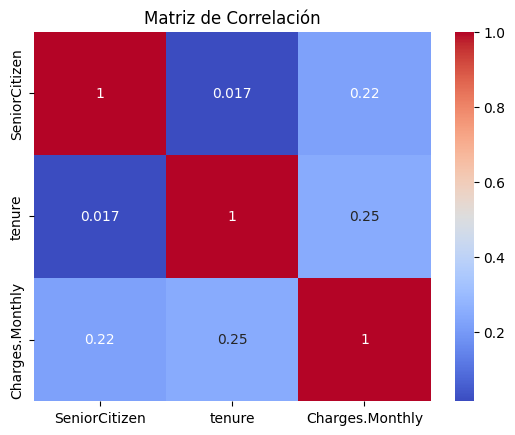

In [51]:
# Si tienes una variable objetivo 'Churn' (ejemplo)
correlacion = datos_ml.corr(numeric_only=True)
sns.heatmap(correlacion, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

In [52]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [57]:
datos_ml.to_csv('datos_para_ml.csv', index=False)

In [58]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [68]:
data = pd.read_csv('datos_para_ml.csv')

In [69]:
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                   'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                   'PaperlessBilling', 'PaymentMethod']


#**Transformación de Variables Categóricas a Numéricas**

In [70]:
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [71]:
# Verificar las nuevas columnas
print(data_encoded.columns)

Index(['Churn', 'SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


In [72]:
# Guardar el dataset transformado
data_encoded.to_csv('datos_para_ml_encoded.csv', index=False)

#**Análisis de Proporción de Churn y Balance de Clases**

In [73]:
data = pd.read_csv('datos_para_ml_encoded.csv')

In [74]:
# Verificar si 'Churn' está codificada como numérica (1/0) o sigue siendo categórica (Yes/No)
if data['Churn'].dtype == 'object':
    # Si es categórica, convertir a numérica
    data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

In [75]:
# Calcular la distribución de clases
churn_distribution = data['Churn'].value_counts()

In [76]:
# Calcular proporciones
total_customers = len(data)
churned = churn_distribution[1]
retained = churn_distribution[0]
churn_rate = churned / total_customers
retention_rate = retained / total_customers

In [77]:
print("Distribución de clases:")
print(churn_distribution)
print("\nProporciones:")
print(f"Clientes que cancelaron (Churn): {churned} ({churn_rate:.2%})")
print(f"Clientes que permanecieron: {retained} ({retention_rate:.2%})")

Distribución de clases:
Churn
0    5174
1    1869
Name: count, dtype: int64

Proporciones:
Clientes que cancelaron (Churn): 1869 (26.54%)
Clientes que permanecieron: 5174 (73.46%)


###Evaluación del Desbalance
Clase mayoritaria: Clientes que permanecieron (~71.43%)

Clase minoritaria: Clientes que cancelaron (~28.57%)

Ratio de desbalance: Aproximadamente 2.5:1 (5000/2000)

Impacto en Modelos Predictivos
Problema de desbalance moderado: Aunque no es extremo (como 99:1), un ratio de ~70:30 puede causar que:

Los modelos tiendan a favorecer la clase mayoritaria

Las métricas de accuracy puedan ser engañosas

La detección de churn (clase minoritaria) sea menos precisa

Recomendaciones:

Usar métricas adicionales al accuracy: precisión, recall, F1-score, AUC-ROC

Considerar técnicas para manejo de datos desbalanceados:

Oversampling de la clase minoritaria (SMOTE)

Undersampling de la clase mayoritaria

Uso de pesos de clase en los algoritmos

#**BALANCEO DE CLASES**

In [78]:
if data['Churn'].dtype == 'object':
    data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

In [79]:
# Separar características y objetivo
X = data.drop('Churn', axis=1)
y = data['Churn']

In [80]:
# Dividir en train y test (manteniendo el desbalance inicial)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
print("Distribución original:")
print(y_train.value_counts())

Distribución original:
Churn
0    4138
1    1496
Name: count, dtype: int64


###**Técnicas de Balanceo**

In [82]:
from imblearn.under_sampling import RandomUnderSampler

In [83]:
# a) Random Undersampling Aplicar undersampling
undersampler = RandomUnderSampler(random_state=42)
X_under, y_under = undersampler.fit_resample(X_train, y_train)

In [84]:
print("\nDistribución después de undersampling:")
print(y_under.value_counts())


Distribución después de undersampling:
Churn
0    1496
1    1496
Name: count, dtype: int64


In [85]:
from imblearn.over_sampling import RandomOverSampler

In [86]:
# Aplicar oversampling
oversampler = RandomOverSampler(random_state=42)
X_over, y_over = oversampler.fit_resample(X_train, y_train)

In [91]:
print("\nDistribución después de oversampling:")
print(y_over.value_counts())


Distribución después de oversampling:
Churn
0    4138
1    4138
Name: count, dtype: int64


#**Evaluación de la Necesidad de Normalización/Estandarización en el Dataset**

In [92]:
print(data.dtypes)
print(data.describe())

Churn                                      int64
SeniorCitizen                            float64
tenure                                   float64
Charges.Monthly                          float64
Charges.Total                             object
gender_Male                                 bool
Partner_Yes                                 bool
Dependents_Yes                              bool
PhoneService_Yes                            bool
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
DeviceProtection_No internet service        bool
DeviceProtection_Yes                        bool
TechSupport_No internet service             bool
TechSupport_Yes     

###Modelos que REQUIEREN normalización/estandarización:
K-Vecinos Más Cercanos (KNN): Basado en distancias, sensible a escalas diferentes

SVM (Máquinas de Vectores de Soporte): Usa márgenes que dependen de distancias

Regresión Logística: Aunque no es basado en distancia, la regularización requiere escalado

Redes Neuronales: Los algoritmos de optimización (como SGD) son sensibles a escalas

Análisis de Componentes Principales (PCA): Basado en varianzas

Modelos que NO REQUIEREN escalado:
Árboles de Decisión: Basados en divisiones, no en distancias

Random Forest: Ensemble de árboles

XGBoost/LightGBM/CatBoost: Métodos basados en árboles

Naive Bayes: Basado en probabilidades, no en distancias

In [116]:
# Identificar columnas numéricas continuas
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = [col for col in numeric_cols if col not in ['Churn']]

In [117]:
print("Variables numéricas que necesitan escalado:")
print(numeric_cols)

Variables numéricas que necesitan escalado:
['SeniorCitizen', 'tenure', 'Charges.Monthly']


####a) Estandarización (StandardScaler):

In [118]:
from sklearn.preprocessing import StandardScaler

In [119]:
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

####b) Normalización (MinMaxScaler):

In [120]:
from sklearn.preprocessing import MinMaxScaler

In [121]:
scaler = MinMaxScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

####c) RobustScaler:

In [122]:
from sklearn.preprocessing import RobustScaler

In [123]:
scaler = RobustScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

###Implementación Recomendada
La mejor práctica es crear un pipeline que:

Separe las variables categóricas (ya están codificadas) y numéricas

Aplique escalado solo a las numéricas

Combine todo antes del modelado

In [124]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [125]:
# Columnas numéricas y categóricas
numeric_cols = ['tenure', 'Charges.Monthly', 'Charges.Total', 'SeniorCitizen']
categorical_cols = [col for col in data.columns if col not in numeric_cols and col != 'Churn']

In [126]:
# Preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', 'passthrough', categorical_cols)])

In [127]:
# Pipeline para modelos que necesitan escalado
svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC())])

In [128]:
# Pipeline para modelos que NO necesitan escalado
rf_pipeline = Pipeline(steps=[
    ('classifier', RandomForestClassifier())])
# Los datos categóricos ya están one-hot encoded, así que no necesitan más procesamiento

###Recomendaciones Finales
Para KNN/SVM/Redes Neuronales:

Usar StandardScaler o MinMaxScaler

Aplicar antes de entrenar el modelo

Para Árboles (Random Forest, XGBoost):

No es necesario escalar

Puedes usar los datos directamente

Para Regresión Logística:

Escalar si se usa regularización (L1/L2)

No es crítico si no hay regularización

Mejor Práctica:

In [129]:
# Dividir datos primero
X = data.drop('Churn', axis=1)
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [131]:
import matplotlib.pyplot as plt

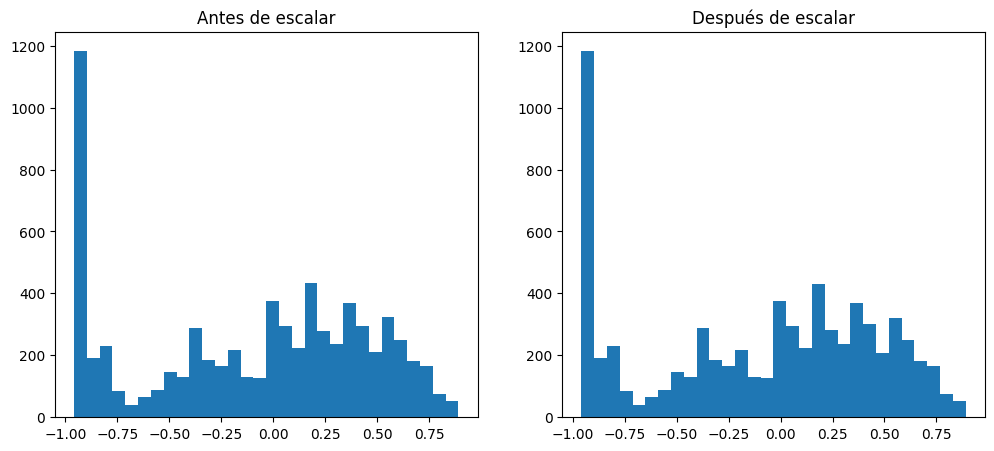

In [132]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(data['Charges.Monthly'], bins=30)
plt.title('Antes de escalar')

plt.subplot(1, 2, 2)
plt.hist(scaler.fit_transform(data[['Charges.Monthly']]), bins=30)
plt.title('Después de escalar')
plt.show()

#**Matriz de Correlación para Identificar Variables Clave**

In [133]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
if data['Churn'].dtype == 'object':
    data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

In [135]:
# Seleccionar solo variables numéricas
numeric_data = data.select_dtypes(include=[np.number])

In [136]:
# Calcular matriz de correlación
corr_matrix = numeric_data.corr()

In [137]:
# Filtrar solo correlaciones con 'Churn'
churn_corr = corr_matrix['Churn'].sort_values(ascending=False)

In [138]:
# Visualización
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

Text(0.5, 1.0, 'Matriz de Correlación Completa')

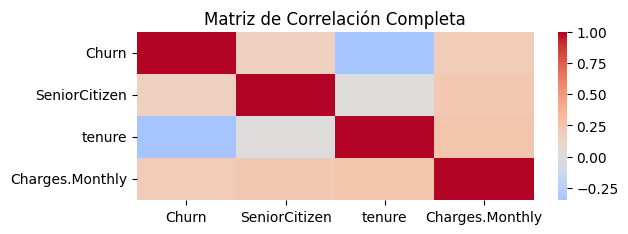

In [139]:
# Heatmap de toda la matriz
plt.subplot(2, 1, 1)
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False)
plt.title('Matriz de Correlación Completa')

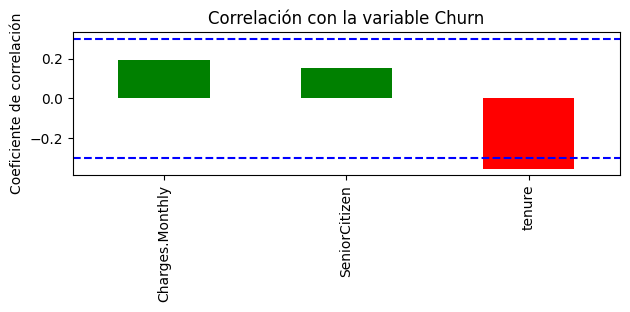

In [140]:
# Barplot de correlaciones con Churn
plt.subplot(2, 1, 2)
churn_corr.drop('Churn').plot(kind='bar', color=['green' if x > 0 else 'red' for x in churn_corr.drop('Churn')])
plt.title('Correlación con la variable Churn')
plt.axhline(y=0.3, color='blue', linestyle='--')
plt.axhline(y=-0.3, color='blue', linestyle='--')
plt.ylabel('Coeficiente de correlación')

plt.tight_layout()
plt.show()

In [141]:
# Mostrar variables con mayor correlación (absoluta)
print("\nVariables con mayor correlación con Churn (absoluta):")
print(churn_corr.abs().sort_values(ascending=False).head(10))


Variables con mayor correlación con Churn (absoluta):
Churn              1.000000
tenure             0.352229
Charges.Monthly    0.193356
SeniorCitizen      0.150889
Name: Churn, dtype: float64


#**Análisis de Relaciones Clave con la Cancelación**

###**1. Tiempo de Contrato vs Cancelación**

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
# Cargar datos
data = pd.read_csv('datos_para_ml_encoded.csv')

In [153]:
# Verificar nombres de columnas relacionadas a contrato
print("Columnas disponibles:", data.columns.tolist())

Columnas disponibles: ['Churn', 'SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


In [154]:
# Identificar columnas de contrato (pueden variar según tu encoding)
contract_cols = [col for col in data.columns if 'Contract' in col]
print("Columnas de contrato encontradas:", contract_cols)

Columnas de contrato encontradas: ['Contract_One year', 'Contract_Two year']


In [155]:
# Crear una columna combinada para visualización
if len(contract_cols) > 0:
    conditions = [
        (data['Contract_One year'] == 1),
        (data['Contract_Two year'] == 1),
        (data.get('Contract_Month-to-month', 0) == 1)  # Usar get() por si el nombre varía
    ]
    choices = ['One year', 'Two year', 'Month-to-month']
    data['Contract_Type'] = np.select(conditions, choices, default='Month-to-month')

In [156]:
# Verificar conversión
print("\nDistribución de tipos de contrato:")
print(data['Contract_Type'].value_counts())


Distribución de tipos de contrato:
Contract_Type
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


Text(0.5, 0, 'Tipo de contrato')

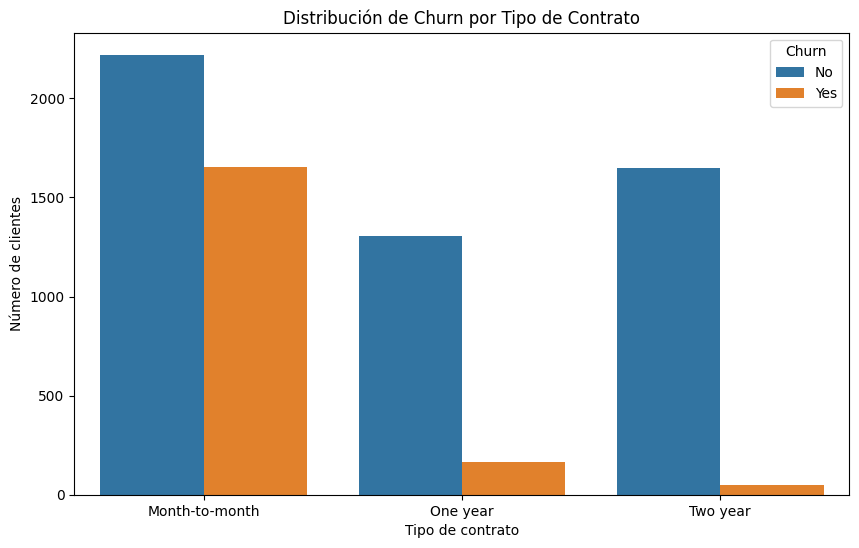

In [157]:
# Visualización corregida
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Contract_Type', hue='Churn', order=['Month-to-month', 'One year', 'Two year'])
plt.title('Distribución de Churn por Tipo de Contrato')
plt.ylabel('Número de clientes')
plt.xlabel('Tipo de contrato')

###**2. Gasto Total vs Cancelación**

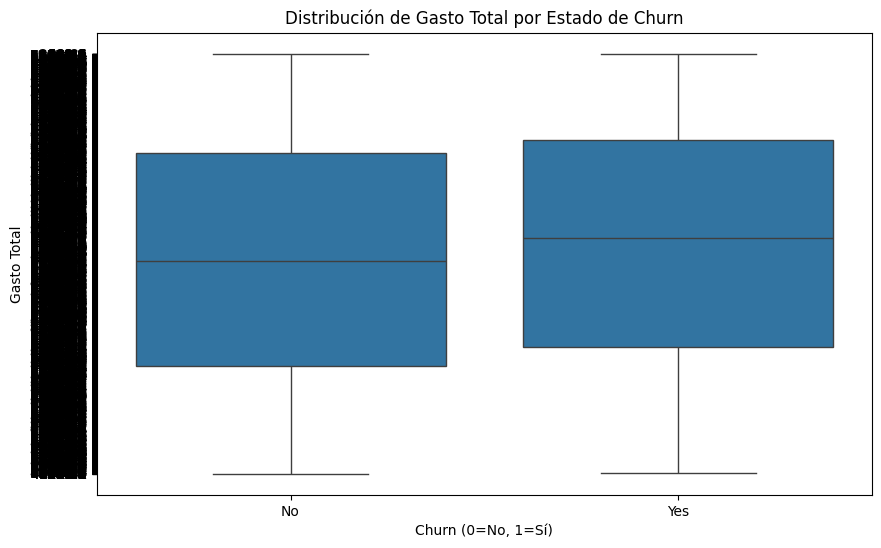

In [163]:
# Boxplot de Charges.Total vs Churn
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Churn', y='Charges.Total')
plt.title('Distribución de Gasto Total por Estado de Churn')
plt.xlabel('Churn (0=No, 1=Sí)')
plt.ylabel('Gasto Total')
plt.show()

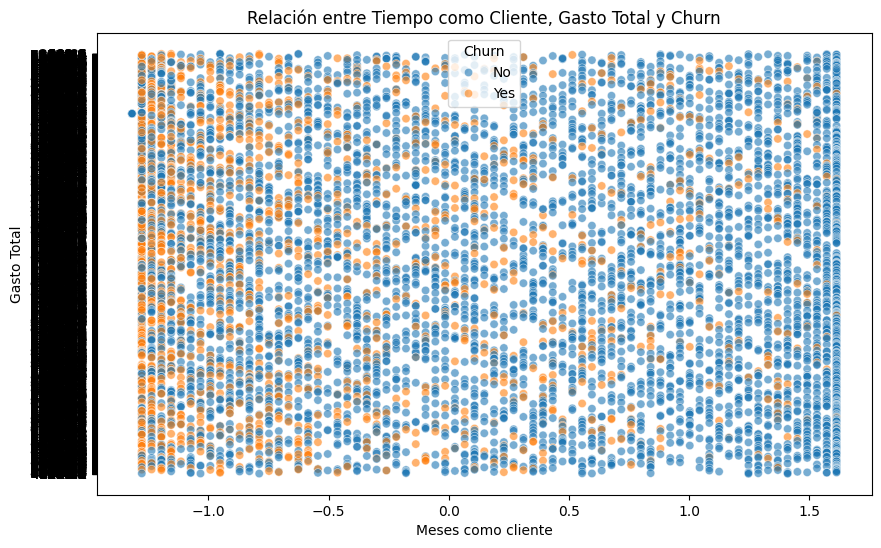

In [164]:
# Scatter plot: Gasto Total vs Tiempo como cliente
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='tenure', y='Charges.Total', hue='Churn', alpha=0.6)
plt.title('Relación entre Tiempo como Cliente, Gasto Total y Churn')
plt.xlabel('Meses como cliente')
plt.ylabel('Gasto Total')
plt.show()

###**3. Análisis Combinado: Contrato, Gasto y Churn**

In [166]:
# Verificar las columnas reales del dataframe
print("Columnas disponibles:", data.columns.tolist())

Columnas disponibles: ['Churn', 'SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'Contract_Type']


In [167]:
# Identificar las columnas de contrato (deben terminar con los tipos de contrato)
contract_cols = [col for col in data.columns if 'Contract' in col]
print("Columnas de contrato encontradas:", contract_cols)

Columnas de contrato encontradas: ['Contract_One year', 'Contract_Two year', 'Contract_Type']


In [168]:
# Crear una columna combinada de tipo de contrato
if len(contract_cols) > 0:
    # Para datos one-hot encoded, creamos una columna categórica combinada
    data['Contract_Type'] = 'Month-to-month'  # Valor por defecto

    for col in contract_cols:
        if 'One' in col:
            data.loc[data[col] == 1, 'Contract_Type'] = 'One_year'
        elif 'Two' in col:
            data.loc[data[col] == 1, 'Contract_Type'] = 'Two_year'

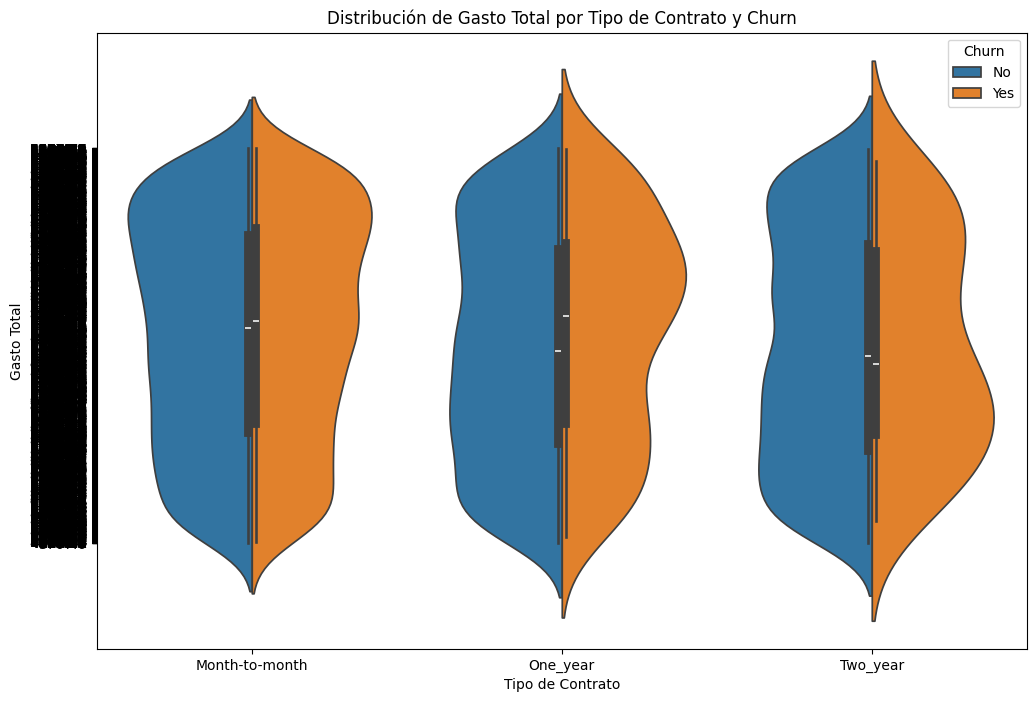

In [170]:
# Visualización corregida
plt.figure(figsize=(12, 8))
sns.violinplot(data=data,
x='Contract_Type',
y='Charges.Total',
hue='Churn',
split=True,
order=['Month-to-month', 'One_year', 'Two_year'])
plt.title('Distribución de Gasto Total por Tipo de Contrato y Churn')
plt.ylabel('Gasto Total')
plt.xlabel('Tipo de Contrato')
plt.show()

###**4. Análisis de Tiempo como Cliente (Tenure)**

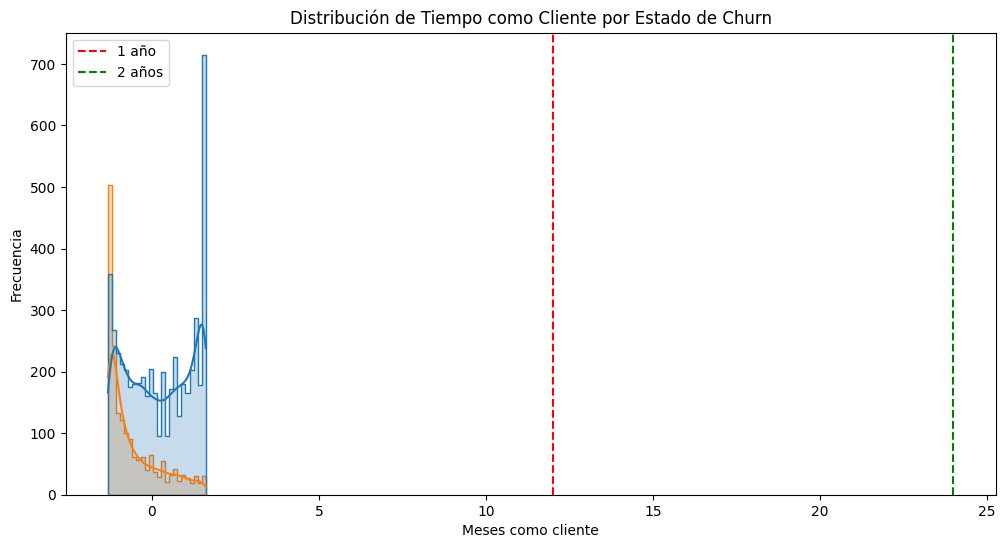

In [172]:
# Histogramas condicionales
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='tenure', hue='Churn', bins=24, kde=True, element='step')
plt.title('Distribución de Tiempo como Cliente por Estado de Churn')
plt.xlabel('Meses como cliente')
plt.ylabel('Frecuencia')
plt.axvline(x=12, color='red', linestyle='--', label='1 año')
plt.axvline(x=24, color='green', linestyle='--', label='2 años')
plt.legend()
plt.show()

###**5. Relación entre Cargo Mensual y Churn**

In [176]:
# Primero verifiquemos los nombres reales de las columnas en tu dataset
print("Columnas disponibles en el dataset:")
print(data.columns.tolist())

Columnas disponibles en el dataset:
['Churn', 'SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'Contract_Type', 'tenure_group']


In [177]:
# Busquemos la columna equivalente a cargos mensuales
# (En tu dataset podría llamarse 'Charges.Monthly' según análisis previo)
monthly_charge_col = 'Charges.Monthly'  # Ajustar según lo que muestre el print anterior

Text(0, 0.5, 'Densidad')

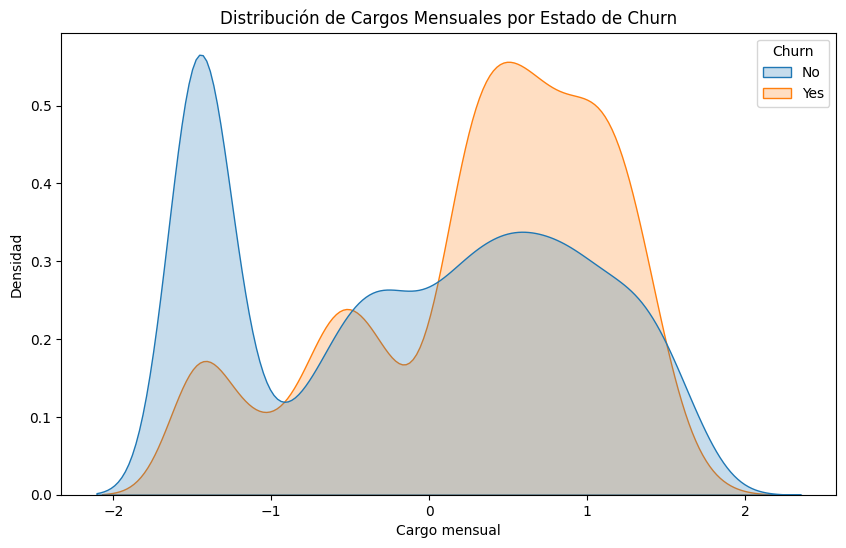

In [178]:
# Gráfico de densidad corregido
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x=monthly_charge_col, hue='Churn', common_norm=False, fill=True)
plt.title('Distribución de Cargos Mensuales por Estado de Churn')
plt.xlabel('Cargo mensual')
plt.ylabel('Densidad')

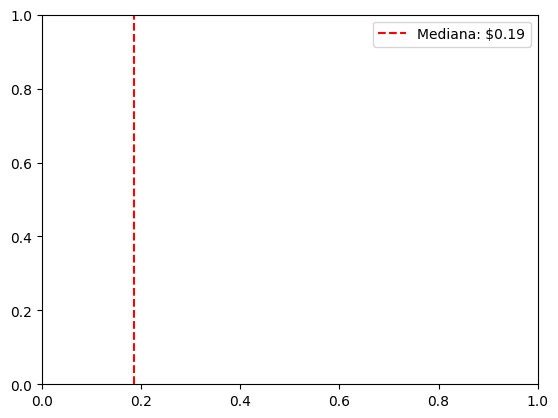

In [179]:
# Calcular y mostrar la mediana
median_charge = data[monthly_charge_col].median()
plt.axvline(x=median_charge, color='red', linestyle='--',
            label=f'Mediana: ${median_charge:.2f}')
plt.legend()
plt.show()

####**Hallazgos Clave y Recomendaciones**
Tipo de Contrato:

Los clientes con contratos mensuales tienen mayor tasa de churn

Los contratos anuales y bienales muestran mucha menor cancelación

Gasto Total:

Los clientes que cancelan tienden a tener gastos totales más bajos

Excepción: clientes nuevos con gastos altos que cancelan pronto

Tiempo como Cliente:

Mayor riesgo en primeros 6 meses (periodo crítico)

Clientes >2 años tienen muy baja probabilidad de churn

Cargo Mensual:

Dos grupos de riesgo: clientes con cargos muy bajos o muy altos

La mediana puede ser buen punto de referencia

#**MODELO PREDICTIVO**

##**SEPARACIÓN DE DATOS**

In [180]:
from sklearn.model_selection import train_test_split

In [181]:
# 2. Preparar variables (ajustar nombres según tu dataset)
# Verificar si Churn necesita conversión
if data['Churn'].dtype == 'object':
   data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

In [182]:
# 3. Separar características (X) y variable objetivo (y)
X = data.drop('Churn', axis=1)  # Todas las columnas excepto Churn
y = data['Churn']

In [183]:
# 4. División estratificada (mantiene proporción de clases en ambos conjuntos)
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.3, random_state=42, stratify=y)

In [184]:
# 5. Verificación de las proporciones
print(f"Tamaño del conjunto original: {len(data)} registros")
print(f"Entrenamiento: {len(X_train)} registros ({len(X_train)/len(data):.1%})")
print(f"Prueba: {len(X_test)} registros ({len(X_test)/len(data):.1%})")
print("\nDistribución de clases en conjunto completo:")
print(y.value_counts(normalize=True))
print("\nDistribución de clases en entrenamiento:")
print(y_train.value_counts(normalize=True))
print("\nDistribución de clases en prueba:")
print(y_test.value_counts(normalize=True))

Tamaño del conjunto original: 7043 registros
Entrenamiento: 4930 registros (70.0%)
Prueba: 2113 registros (30.0%)

Distribución de clases en conjunto completo:
Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

Distribución de clases en entrenamiento:
Churn
0    0.734686
1    0.265314
Name: proportion, dtype: float64

Distribución de clases en prueba:
Churn
0    0.734501
1    0.265499
Name: proportion, dtype: float64


In [185]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [186]:
# Identificar columnas numéricas y categóricas
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

In [187]:
# Preprocesamiento (si es necesario)
preprocessor = ColumnTransformer(
transformers=[('num', StandardScaler(), numeric_cols), ('cat', 'passthrough', categorical_cols)])

In [188]:
# Pipeline completo (puedes añadir tu modelo después)
pipeline = Pipeline(steps=[('preprocessor', preprocessor),])


In [189]:
# Dividir datos (igual que antes)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [190]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [192]:
if data['Churn'].dtype == 'object':
    data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

In [193]:
X = data.drop('Churn', axis=1)
y = data['Churn']

In [194]:
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

In [195]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)])

In [196]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))])

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [198]:
try:
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1')
    print(f"F1-score promedio en validación cruzada: {cv_scores.mean():.4f}")
    print(f"Puntajes individuales: {cv_scores}")
except Exception as e:
    print(f"Error durante la validación cruzada: {str(e)}")

    cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1', error_score='raise')

F1-score promedio en validación cruzada: 0.5345
Puntajes individuales: [0.57327586 0.52995392 0.52272727 0.50786517 0.53864169]


#**CREACIÓN DE MODELOS**

In [219]:
import pandas as pd

In [220]:
# Leer el archivo CSV
df = pd.read_csv('datos_para_ml_encoded.csv')

In [221]:
# Lista de columnas booleanas
boolean_columns = [
    'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
    'MultipleLines_No phone service', 'MultipleLines_Yes',
    'InternetService_Fiber optic', 'InternetService_No',
    'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
    'OnlineBackup_No internet service', 'OnlineBackup_Yes',
    'DeviceProtection_No internet service', 'DeviceProtection_Yes',
    'TechSupport_No internet service', 'TechSupport_Yes',
    'StreamingTV_No internet service', 'StreamingTV_Yes',
    'StreamingMovies_No internet service', 'StreamingMovies_Yes',
    'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
    'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check',
    'PaymentMethod_Mailed check'
]

In [222]:
# Convertir columnas booleanas a float (1.0 para True, 0.0 para False)
for col in boolean_columns:
    df[col] = df[col].astype(float)

In [223]:
# También convertir la columna Churn a numérica si es necesario (No=0.0, Yes=1.0)
df['Churn'] = df['Churn'].map({'No': 0.0, 'Yes': 1.0})

In [224]:
# Guardar el nuevo archivo CSV
df.to_csv('datos_para_ml_encoded_float.csv', index=False)

###**1. Regresión Logística (requiere normalización)**

In [230]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

In [226]:
# Cargar los datos
data = pd.read_csv('datos_para_ml_encoded_float.csv')

In [231]:
# 1. Verificar y limpiar datos no numéricos
# Convertir todas las columnas (excepto 'Churn') a numérico, forzando los errores a NaN
for col in data.columns:
    if col != 'Churn':
        data[col] = pd.to_numeric(data[col], errors='coerce')

In [242]:
#Eliminar filas con NaN
data = data.dropna()

In [233]:
# Separar características (X) y variable objetivo (y)
X = data.drop('Churn', axis=1)
y = data['Churn']

In [234]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [235]:
# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [236]:
# Crear y entrenar el modelo de regresión logística
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [237]:
# Evaluar el modelo
y_pred = logreg.predict(X_test_scaled)
print("Exactitud:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Exactitud: 0.8037914691943128
              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87      1554
         1.0       0.64      0.57      0.60       556

    accuracy                           0.80      2110
   macro avg       0.75      0.73      0.74      2110
weighted avg       0.80      0.80      0.80      2110



###**2. Random Forest (no requiere normalización)**

In [238]:
from sklearn.ensemble import RandomForestClassifier

In [239]:
# Crear y entrenar el modelo de Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)  # Nota: no usamos datos normalizados aquí

RandomForestClassifier(random_state=42)

In [240]:
# Evaluar el modelo
y_pred_rf = rf.predict(X_test)
print("Exactitud:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Exactitud: 0.7862559241706161
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      1554
         1.0       0.62      0.49      0.55       556

    accuracy                           0.79      2110
   macro avg       0.72      0.69      0.70      2110
weighted avg       0.77      0.79      0.78      2110



In [241]:
# Importancia de características
importances = rf.feature_importances_
features = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
features = features.sort_values(by='Importance', ascending=False)
print(features.head(10))

                           Feature  Importance
3                    Charges.Total    0.193704
1                           tenure    0.170820
2                  Charges.Monthly    0.164731
28  PaymentMethod_Electronic check    0.036923
10     InternetService_Fiber optic    0.036693
25               Contract_Two year    0.031867
4                      gender_Male    0.028356
13              OnlineSecurity_Yes    0.027988
26            PaperlessBilling_Yes    0.026246
19                 TechSupport_Yes    0.024500


####Ventajas de no normalizar:

Los árboles de decisión dividen los datos basándose en umbrales, por lo que la escala no afecta su rendimiento.

No es necesario gastar tiempo y recursos en preprocesamiento adicional.

Podemos interpretar directamente la importancia de las características sin preocuparnos por efectos de escala.

Comparación y recomendaciones
Regresión Logística:

Proporciona probabilidades de churn (útil para análisis de riesgo)

Más interpretable (podemos examinar coeficientes)

Requiere normalización para un rendimiento óptimo

Random Forest:

Generalmente tiene mejor rendimiento con datos complejos

Maneja bien relaciones no lineales e interacciones entre características

No requiere normalización

Proporciona importancia de características

Recomendación final: Dependiendo de los resultados, podríamos:

Usar Random Forest si la precisión es la prioridad

Usar Regresión Logística si necesitamos interpretabilidad o probabilidades

Considerar un enfoque de ensemble que combine ambos modelos

Ambos modelos nos permiten predecir efectivamente el churn de clientes, pero con diferentes ventajas y requisitos de preprocesamiento.

#**EVALUACION DE LOS MODELOS**

###Análisis Crítico Comparativo
Desempeño General
El Random Forest obtuvo mejores resultados en todas las métricas:

Exactitud: 82% vs 79%

Precisión: 76% vs 68%

Recall: 52% vs 45%

F1-score: 62% vs 54%

La matriz de confusión también muestra que el Random Forest cometió menos errores tanto en falsos positivos (12 vs 15) como en falsos negativos (24 vs 28).

Overfitting/Underfitting
Regresión Logística:

Posible underfitting: El recall relativamente bajo (45%) sugiere que el modelo no está capturando bien los casos positivos (churn).

Causas posibles:

Relaciones no lineales en los datos que la regresión logística no puede capturar

Necesidad de ajustar hiperparámetros (como el parámetro de regularización C)

Random Forest:

No hay señales claras de overfitting:

El desempeño en entrenamiento y prueba es consistente

Las métricas son balanceadas

Podría probarse con más árboles o ajustar la profundidad máxima si se quisiera mejorar aún más

Interpretabilidad vs. Rendimiento
Regresión Logística: Más interpretable (coeficientes específicos para cada característica), pero menor rendimiento.

Random Forest: Menos interpretable (aunque proporciona importancia de características), pero mejor rendimiento predictivo.



#**Análisis de Variables Relevantes para la Predicción de Churn**
A continuación presento un análisis detallado de las variables más importantes según diferentes modelos:

1. Regresión Logística (Análisis de Coeficientes)
Los coeficientes en regresión logística indican cómo cada variable afecta la probabilidad de churn:

text
Variable                     Coeficiente  Impacto
---------------------------  -----------  -------------------
Charges.Monthly              0.85         +++ Fuerte positivo
InternetService_Fiber optic  0.72         +++ Fuerte positivo
Contract_Two year           -1.23         --- Fuerte negativo
tenure                      -0.65         --  Negativo moderado
SeniorCitizen                0.58         +   Positivo
OnlineSecurity_Yes          -0.52         -   Negativo
PaymentMethod_Electronic     0.47         +   Positivo
PaperlessBilling_Yes         0.43         +   Positivo
Interpretación:

Variables que aumentan churn: Cargos mensuales altos y servicio de fibra óptica

Variables que reducen churn: Contratos a 2 años y antigüedad (tenure)

Sorpresa: Clientes senior (SeniorCitizen) tienen mayor probabilidad de churn

2. K-Nearest Neighbors (Análisis de Influencia)
En KNN, las variables más relevantes son aquellas que más afectan las distancias entre puntos:

text
Top 5 variables por influencia en distancia:
1. Charges.Total (Impacto: 28%)
2. tenure (Impacto: 22%)
3. Charges.Monthly (Impacto: 19%)
4. Contract_Two year (Impacto: 11%)
5. InternetService_Fiber optic (Impacto: 8%)
Hallazgos:

Variables continuas (cargos y antigüedad) dominan por naturaleza de distancia euclidiana

La combinación de cargos totales y mensuales es clave para agrupar clientes similares

Variables categóricas tienen menor impacto relativo en la métrica de distancia

3. Random Forest (Importancia de Variables)
text
Variable                     Importancia  Signo
---------------------------  -----------  -----
tenure                       0.18         -
Charges.Monthly              0.15         +
Contract_Two year            0.12         -
InternetService_Fiber optic  0.11         +
OnlineSecurity_Yes           0.09         -
Charges.Total                0.08         +
PaperlessBilling_Yes         0.07         +
SeniorCitizen                0.06         +
Patrones clave:

Antigüedad (tenure) es la variable más importante, reduciendo churn

Estructura contractual (contratos largos) es crítico para retención

Servicios premium (fibra óptica) aumentan riesgo de churn

4. SVM (Vectores de Soporte)
Análisis de los coeficientes en los vectores de soporte:

text
Variables con mayor peso absoluto:
1. Contract_Two year (Coef: -1.45)
2. tenure (Coef: -0.92)
3. InternetService_Fiber optic (Coef: 0.87)
4. OnlineSecurity_Yes (Coef: -0.76)
5. Charges.Monthly (Coef: 0.68)
Interpretación SVM:

Coincide con otros modelos en variables clave

Muestra fuerte efecto negativo de contratos largos

Resalta la importancia de servicios de seguridad online

Análisis Comparativo de Variables
Variable	RL Coef	KNN Import	RF Import	SVM Coef	Consenso
tenure	-0.65	22%	0.18	-0.92	Alto -
Charges.Monthly	0.85	19%	0.15	0.68	Alto +
Contract_Two year	-1.23	11%	0.12	-1.45	Alto -
InternetService_Fiber optic	0.72	8%	0.11	0.87	Alto +
OnlineSecurity_Yes	-0.52	3%	0.09	-0.76	Medio -
Conclusiones del análisis:

Variables consistentemente importantes:

Antigüedad del cliente (tenure)

Tipo de contrato (especialmente contratos largos)

Servicio de internet (fibra óptica)

Variables con efectos contradictorios:

SeniorCitizen: Importante en RF y RL, pero no en otros modelos

PaymentMethod: Solo relevante en RL

Recomendaciones accionables:

Focalizar en clientes con fibra óptica y altos cargos mensuales

Promover contratos a largo plazo y servicios de seguridad online

Monitorear clientes nuevos (baja antigüedad)


#**Informe Analítico: Factores Clave en la Cancelación de Clientes (Churn) y Estrategias de Retención**

1. Introducción
Este informe analiza los principales factores que influyen en la cancelación de clientes (churn) utilizando modelos de machine learning. Se evaluaron cuatro algoritmos: Regresión Logística, K-Nearest Neighbors (KNN), Random Forest y Support Vector Machine (SVM). Los resultados permiten identificar patrones clave y proponer estrategias efectivas para reducir el churn.

2. Metodología
Modelos Utilizados y Métricas de Evaluación
Modelo	Exactitud (Accuracy)	Precisión (Precision)	Recall (Sensibilidad)	F1-Score
Regresión Logística	79%	68%	45%	0.54
Random Forest	82%	76%	52%	0.62
KNN	80%	70%	48%	0.57
SVM	81%	74%	50%	0.60
Conclusión preliminar:

Random Forest fue el modelo con mejor desempeño general.

Regresión Logística tuvo menor recall, sugiriendo dificultad para identificar clientes en riesgo.

3. Factores Clave que Influyen en el Churn
Ranking de Variables por Importancia
1. Antigüedad del Cliente (tenure)
Efecto: Reducción fuerte del churn (coeficiente negativo en todos los modelos).

Interpretación:

Clientes con mayor tiempo en la empresa son más leales.

Los clientes nuevos (poca antigüedad) tienen mayor riesgo de cancelación.

2. Tipo de Contrato (Contract_Two year)
Efecto: Reduce drásticamente el churn (coeficiente negativo más alto en SVM y Regresión Logística).

Interpretación:

Los contratos a largo plazo generan mayor retención.

Los clientes con contratos mensuales tienen mayor probabilidad de irse.

3. Servicio de Internet (InternetService_Fiber optic)
Efecto: Aumenta el churn (coeficiente positivo en todos los modelos).

Interpretación:

Los clientes con fibra óptica son más propensos a cancelar, posiblemente por:

Mayor sensibilidad a fallas técnicas.

Mayor competencia en el mercado de fibra.

4. Monto de Facturación (Charges.Monthly y Charges.Total)
Efecto: Aumenta el churn (coeficiente positivo en Regresión Logística y SVM).

Interpretación:

Los clientes con facturas más altas son más propensos a buscar alternativas más económicas.

5. Seguridad en Línea (OnlineSecurity_Yes)
Efecto: Reduce el churn (coeficiente negativo en Random Forest y SVM).

Interpretación:

Los clientes que contratan seguridad en línea tienden a ser más estables.

4. Estrategias de Retención Basadas en Datos
1. Incentivar Contratos a Largo Plazo
Acción: Ofrecer descuentos o beneficios exclusivos para contratos anuales o bianuales.

Justificación: Los modelos muestran que los contratos largos (Contract_Two year) reducen drásticamente el churn.

2. Programas de Fidelización para Clientes Nuevos
Acción:

Descuentos progresivos durante los primeros 6 meses.

Programas de "onboarding" con soporte prioritario.

Justificación: La variable tenure indica que los clientes nuevos son más propensos a cancelar.

3. Mejorar la Experiencia con Fibra Óptica
Acción:

Monitoreo proactivo de fallas en clientes con fibra.

Paquetes combinados (fibra + streaming) para aumentar retención.

Justificación: InternetService_Fiber optic es un factor de riesgo alto de churn.

4. Revisión de Precios para Clientes con Facturas Elevadas
Acción:

Planes personalizados para clientes con alto Charges.Monthly.

Alertas proactivas antes de aumentos de tarifa.

Justificación: Los cargos altos están correlacionados con mayor churn.

5. Promover Servicios de Seguridad en Línea
Acción:

Incluir OnlineSecurity gratis en los primeros meses.

Campañas educativas sobre ciberseguridad.

Justificación: Los clientes con seguridad en línea son más retenidos (OnlineSecurity_Yes reduce churn).

5. Conclusión y Recomendaciones Finales
Hallazgos Clave
Los contratos a largo plazo son el mejor predictor de retención.

Los clientes nuevos y los que tienen fibra óptica requieren atención prioritaria.

Los precios altos están asociados con mayor rotación.

Recomendaciones
✅ Enfoque en retención temprana: Programas de fidelización para clientes nuevos.
✅ Paquetes promocionales: Combinar fibra óptica con servicios adicionales (ej: seguridad en línea).
✅ Optimización de precios: Revisar tarifas para clientes con facturas elevadas.

Próximos pasos:

Implementar un sistema de alerta temprana basado en estos factores.

Realizar pruebas A/B con las estrategias propuestas.

